# Project Phase II
### Research Question
How do factors regarding gender equality and economic status (GDP, government expenditure on education, educational attainment of women, and gender wage gap) affect women author participation in jounals?

### Data collection and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Percentage of women author participation in jounals by year for each country
Source file description (Luke Holman, 2018): The spreadsheet gives the number of male, female and unknown-gender authors that were counted for each combination of year, authorship position (i.e. first/last/middle/single), country (including 'unknown', which refers either to authors with no affiliation, or those with an affiliation for which we could not identify the country), and journal (using the abbreviations favoured by PubMed). 'First' and 'Last' authors were counted from all papers with 2 or more authors. 'Middle' authors are any authors other than the first and last, on papers with three or more authors. Single authors are the authors of papers that list only one author. The unknown-gender authors are people who only gave initials, those whose names were not listed on genderize.io, or those with names that are not associated with one gender >95% of the time (e.g. Alex, Robin).

In [2]:
# source: https://github.com/lukeholman/genderGapCode
women_journal_percentage = pd.read_csv('author_frequency.csv')
# drop position & journal type (unrelated)
women_journal_percentage = women_journal_percentage.drop(columns=['position','journal'])
# add up overall occurance for women(F), men(M), and gender unknown(U) for each year by country
# Reference: https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum
women_journal_percentage = women_journal_percentage.groupby(['country', 'year', 'gender']).sum().reset_index()
women_journal_percentage.head()

,country,year,gender,n
0,Algeria,2001,F,3
1,Algeria,2001,M,2
2,Algeria,2002,F,19
3,Algeria,2002,M,25
4,Algeria,2002,U,6


In [3]:
# drop unknown gender
women_journal_percentage_noU = women_journal_percentage[~women_journal_percentage.gender.str.contains('U')]

# drop unknown country
women_journal_percentage_1 = women_journal_percentage_noU[women_journal_percentage_noU.country != 'Unknown']
women_journal_percentage_1.head()

,country,year,gender,n
0,Algeria,2001,F,3
1,Algeria,2001,M,2
2,Algeria,2002,F,19
3,Algeria,2002,M,25
5,Algeria,2003,F,27


In [4]:
# reshape dataframe
# reference: https://stackoverflow.com/questions/17298313/python-pandas-convert-rows-as-column-headers
df3 = women_journal_percentage_1.pivot_table('n', ['country', 'year'], 'gender').rename_axis(None, axis=1)
df3.reset_index(drop=False, inplace=True)
df3.reindex(['country', 'year', 'F', 'M'], axis=1)

df3.head()

,country,year,F,M
0,Algeria,2001,3.0,2.0
1,Algeria,2002,19.0,25.0
2,Algeria,2003,27.0,29.0
3,Algeria,2004,34.0,33.0
4,Algeria,2005,17.0,28.0


In [5]:
# calculate the percentage of women author participation in jounals by year for each country
df3['F_percentage'] = df3['F']/(df3['F'] + df3['M'])*100
df3.head()

,country,year,F,M,F_percentage
0,Algeria,2001,3.0,2.0,60.000000
1,Algeria,2002,19.0,25.0,43.181818
2,Algeria,2003,27.0,29.0,48.214286
3,Algeria,2004,34.0,33.0,50.746269
4,Algeria,2005,17.0,28.0,37.777778


In [6]:
# only keep data from 2010 to 2016
df3_2016 = df3.loc[(2010 <= df3['year']) & (df3['year']<= 2016)]
df3_2016

,country,year,F,M,F_percentage
9,Algeria,2010,93.0,143.0,39.406780
10,Algeria,2011,117.0,173.0,40.344828
11,Algeria,2012,199.0,259.0,43.449782
12,Algeria,2013,227.0,293.0,43.653846
13,Algeria,2014,151.0,215.0,41.256831
...,...,...,...,...,...
1857,Zimbabwe,2012,44.0,75.0,36.974790
1858,Zimbabwe,2013,67.0,95.0,41.358025
1859,Zimbabwe,2014,93.0,113.0,45.145631
1860,Zimbabwe,2015,60.0,105.0,36.363636


##### Clarification: 
1. Why drop position & journal: The authors' positions (first, middle and last won't affect the overall result of women author participation (which I intend to analyze). The specific journal names also have nothing to do with the participation rate. I would research on a country-by-country basis to distinguish economic and gender equality factors in different economies.
2. Why drop unknown countries: data from unknown countries is invalid data, which is not able for me to categorize and assign remaining factors to see the trends.
3. Why drop unknown gender: Identifying subpopulations that differed significantly. i.e., suppose the number of authors with unknown gender is considerable for some countries. In that case, the percentage of women's participation may differ from its actual value. The difference between this group of countries and other countries with known data will be more significant compared to real cases (even when the economic status of those two countries is similar).
4. Why 2010 - 2016: the economic situation of different countries fluctuated wildly due to the economic crisis, which can also help me to see the influence of economic status on the percentage of women authors' participation in journals in the research question more intuitively.

#### 2. Possible factor: GDP of countries, summarized by year
Source file description (DataHub.io): Country, regional and world GDP in current US Dollars ($).

In [7]:
# source: https://datahub.io/core/gdp#data
gdp = pd.read_csv('gdp_csv.csv')
# rename columns
gdp = gdp.rename(columns={'Country Name':'country', 'Country Code':'country_code', \
                          'Year':'year', 'Value':'GDP'})
# preview
gdp.head()

,country,country_code,year,GDP
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [8]:
# only keep data from 2010 to 2016
gdp_2016 = gdp.loc[(2010 <= gdp['year']) & (gdp['year']<= 2016)]
gdp_2016

,country,country_code,year,GDP
42,Arab World,ARB,2010,2.109646e+12
43,Arab World,ARB,2011,2.501554e+12
44,Arab World,ARB,2012,2.741239e+12
45,Arab World,ARB,2013,2.839627e+12
46,Arab World,ARB,2014,2.906616e+12
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


##### Clarification:
1. Why 2010 - 2016: the economic situation of different countries fluctuated wildly due to the economic crisis, which can also help me to see the influence of economic status on the percentage of women authors' participation in journals in the research question more intuitively. At the same time, almost all countries' GDP data are recorded between 2010 and 2016, which helps me to analyze it more comprehensively. The sort order of this dataset is also kept the same as the one of women participation dataset cleaned before. This step makes it easier for me to merge them together in step 6.
2. Why rename columns: The names of columns in this dataset which overlap with the ones in women participation dataset (country, year) is kept the same as above. This step makes it easier for me to merge them together in step 6.

#### 3. Possible factor: Government expenditure
Source file description (UNESCO Institute for Statistics, 2020): Government expenditure per student, primary (% of GDP per capita)

In [9]:
# source: https://data.worldbank.org/indicator/SE.XPD.PRIM.PC.ZS
expenditure = pd.read_csv('government_expenditure.csv')
# drop indicator name and indicator code
expenditure = expenditure.drop(columns=['Indicator Name', 'Indicator Code'])
# preview
expenditure.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.384430,17.36433,17.08119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.317330,11.17447,11.72219,10.24688,10.34081,10.25174,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.891175,10.67458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# only keep data from 2010 to 2016
expenditure_2016 = expenditure[['Country Name','Country Code','2010','2011','2012','2013','2014','2015','2016']]
# rename columns
expenditure_2016 = expenditure_2016.rename(columns={'Country Name':'country','Country Code':'country_code'})
expenditure_2016.head()

,country,country_code,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,NaN,NaN,18.384430,17.36433,17.08119,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,11.952150,12.211590,8.317330,11.17447,11.72219,10.24688,10.34081
3,Africa Western and Central,AFW,10.917025,10.633625,12.891175,10.67458,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# reshape dataframe
# reference: https://stackoverflow.com/questions/28654047/convert-columns-into-rows-with-pandas
expenditure_reshape = expenditure_2016.melt(id_vars=['country','country_code'], var_name='year', value_name='expenditure_per_student(%GDP)')
# convert year to int
expenditure_reshape['year'] = expenditure_reshape['year'].astype(int)
# sort dataframe by country and year
expenditure_reshape = expenditure_reshape.sort_values(by=['country','year']).reset_index()
expenditure_reshape = expenditure_reshape.drop(columns=['index'])
expenditure_reshape

,country,country_code,year,expenditure_per_student(%GDP)
0,Afghanistan,AFG,2010,11.95215
1,Afghanistan,AFG,2011,12.21159
2,Afghanistan,AFG,2012,8.31733
3,Afghanistan,AFG,2013,11.17447
4,Afghanistan,AFG,2014,11.72219
...,...,...,...,...
1857,Zimbabwe,ZWE,2012,14.01205
1858,Zimbabwe,ZWE,2013,14.00009
1859,Zimbabwe,ZWE,2014,NaN
1860,Zimbabwe,ZWE,2015,NaN


##### Clarification:
1. why drop indicator name, and indicator code: The indicator name and code don't impact or relate to government expenditure and the overall percentage of women author participation.
2. why only keep data from 2001 to 2016: the economic situation of different countries fluctuated wildly due to the economic crisis, which can also help me to see the influence of economic status on the percentage of women authors' participation in journals in the research question more intuitively. At the same time, almost all countries' expenditure data are recorded between 2010 and 2016, which helped me to analyze it more comprehensively. The sort order of this dataset is also kept the same as the one of the women participation datasets cleaned before. This step makes it easier for me to merge them in step 6.
3. why rename columns: The names of columns in this dataset that overlap with the ones in the women participation dataset (country, year) are kept the same as above. This step makes it easier for me to merge them in step 6.
4. why reshape the dataframe: Keep the shape same with the women participation dataset (sort by country and years), making it easier to merge for step 6.
5. why convert year to int: make it easier to sort by years and assign factors in a yearly manner in step 6.
6. why sort dataframe by country and year: Keep the same format of the two datasets generated above. Also, show the progress of expenditure for each country in the same period (2010-2016).

#### 4. Possible factor: Educational Attainment of women
Source file description (UNESCO Institute for Statistics, 2022): Educational Attainment, at least completed upper secondary, female(%) (cumulative)

In [12]:
# source: https://data.worldbank.org/indicator/SE.SEC.CUAT.UP.FE.ZS
e_a = pd.read_csv('educational_attainment_female.csv')
# drop indicator name and indicator code
e_a = e_a.drop(columns=['Indicator Name', 'Indicator Code'])
# preview
e_a.tail()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.818909,NaN,62.796871,62.796791,NaN,60.47858,NaN,54.322811,NaN,NaN
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,Zimbabwe,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.938880,NaN,12.002180,NaN,NaN,9.35805,NaN,NaN,NaN,NaN


In [13]:
# only keep data from 2010 to 2016
e_a_2016 = e_a[['Country Name','Country Code','2010','2011','2012','2013','2014','2015','2016']]
# rename columns
e_a_2016 = e_a_2016.rename(columns={'Country Name':'country','Country Code':'country_code'})
e_a_2016.head(30)

,country,country_code,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,32.074589,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,12.292600,NaN,NaN
5,Albania,ALB,NaN,38.725380,44.491501,NaN,NaN,NaN,NaN
6,Andorra,AND,NaN,NaN,NaN,NaN,47.593479,47.281551,47.035629
7,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# reshape dataframe
# reference: https://stackoverflow.com/questions/28654047/convert-columns-into-rows-with-pandas
e_a_reshape = e_a_2016.melt(id_vars=['country','country_code'], var_name='year', value_name='e_a_percentage(%)')
# convert year to int
e_a_reshape['year'] = e_a_reshape['year'].astype(int)
# sort dataframe by country and year
e_a_reshape = e_a_reshape.sort_values(by=['country','year']).reset_index()
e_a_reshape = e_a_reshape.drop(columns=['index'])
e_a_reshape

,country,country_code,year,e_a_percentage(%)
0,Afghanistan,AFG,2010,NaN
1,Afghanistan,AFG,2011,NaN
2,Afghanistan,AFG,2012,NaN
3,Afghanistan,AFG,2013,NaN
4,Afghanistan,AFG,2014,NaN
...,...,...,...,...
1857,Zimbabwe,ZWE,2012,3.93888
1858,Zimbabwe,ZWE,2013,NaN
1859,Zimbabwe,ZWE,2014,12.00218
1860,Zimbabwe,ZWE,2015,NaN


##### Clarification:
1. why drop indicator name, and indicator code: The indicator name and code don't impact or relate to educational attainment and the overall percentage of women author participation.
2. why only keep data from 2001 to 2016: the economic situation of different countries fluctuated wildly due to the economic crisis, which can also help me to see the influence of economic status on the percentage of women authors' participation in journals in the research question more intuitively. At the same time, almost all educational attainment data are recorded between 2010 and 2016, which helped me to analyze it more comprehensively. The sort order of this dataset is also kept the same as the one of the women participation datasets cleaned before. This step makes it easier for me to merge them in step 6.
3. why rename columns: The names of columns in this dataset that overlap with the ones in the women participation dataset (country, year) are kept the same as above. This step makes it easier for me to merge them in step 6.
4. why reshape the dataframe: Keep the shape same with the women participation dataset (sort by country and years), making it easier to merge for step 6.
5. why convert year to int: make it easier to sort by years and assign factors in a yearly manner in step 6.
6. why sort dataframe by country and year: Keep the same format of the two datasets generated above. Also, show the progress of women educational attainment for each country in the same period (2010-2016).

#### 5. Possible factor: Gender gap in average wages
Source file description (ILOSTAT): Gender wage gap, unadjusted for worker characteristics. Estimates correspond to the difference between
average earnings of men and women, expressed as a percentage(%) of average earnings of men. The gap is positive - women earn less than men.

In [15]:
# source: https://ourworldindata.org/economic-inequality-by-gender
gap = pd.read_csv('gender_gap_in_average_wages.csv')
# preview
gap.head()

,Entity,Code,Year,Gender wage gap (%)
0,Argentina,ARG,1986,15.79
1,Argentina,ARG,1987,12.50
2,Argentina,ARG,1988,11.31
3,Argentina,ARG,1991,6.71
4,Argentina,ARG,1992,8.33


In [16]:
# only keep data from 2010 to 2016
gap_2016 = gap.loc[(gap['Year'] >= 2010) & (gap['Year'] <= 2016)]
# rename columns
gap_2016 = gap_2016.rename(columns={'Entity':'country', 'Code':'country_code', 'Year':'year', \
                                    'Gender wage gap (%)':'gender_wage_gap(%)'})
gap_2016

,country,country_code,year,gender_wage_gap(%)
22,Argentina,ARG,2010,-0.61
23,Argentina,ARG,2011,0.00
24,Argentina,ARG,2012,-1.90
25,Argentina,ARG,2013,1.45
26,Argentina,ARG,2014,-3.62
...,...,...,...,...
395,Uruguay,URY,2012,8.59
396,Uruguay,URY,2013,10.01
397,Uruguay,URY,2014,8.62
411,Vietnam,VNM,2015,7.69


##### Clarification:
1. Why 2010 - 2016: the economic situation of different countries fluctuated wildly due to the economic crisis, which can also help me to see the influence of economic status on the percentage of women authors' participation in journals in the research question more intuitively. At the same time, almost all countries' gender wage gap data are recorded between 2010 and 2016, which helps me to analyze it more comprehensively. The sort order of this dataset is also kept the same as the one of women participation dataset cleaned before. This step makes it easier for me to merge them together in step 6.
2. Why rename columns: The names of columns in this dataset which overlap with the ones in women participation dataset (country, year) is kept the same as above. This step makes it easier for me to merge them together in step 6.

#### 6. Merge the datasets

In [17]:
# avoid warnings when unifying country names
# reference: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None

# unify country names
rename = {'USA':'United States', 'South Korea':'Korea', 'Korea, Rep.':'Korea'} 
df3_2016['country'] = df3_2016['country'].replace(rename)
gdp_2016['country'] = gdp_2016['country'].replace(rename)
expenditure_reshape['country'] = expenditure_reshape['country'].replace(rename)
e_a_reshape['country'] = e_a_reshape['country'].replace(rename)
gap_2016['country'] = gap_2016['country'].replace(rename)

In [18]:
df3_2016

,country,year,F,M,F_percentage
9,Algeria,2010,93.0,143.0,39.406780
10,Algeria,2011,117.0,173.0,40.344828
11,Algeria,2012,199.0,259.0,43.449782
12,Algeria,2013,227.0,293.0,43.653846
13,Algeria,2014,151.0,215.0,41.256831
...,...,...,...,...,...
1857,Zimbabwe,2012,44.0,75.0,36.974790
1858,Zimbabwe,2013,67.0,95.0,41.358025
1859,Zimbabwe,2014,93.0,113.0,45.145631
1860,Zimbabwe,2015,60.0,105.0,36.363636


In [19]:
gdp_2016

,country,country_code,year,GDP
42,Arab World,ARB,2010,2.109646e+12
43,Arab World,ARB,2011,2.501554e+12
44,Arab World,ARB,2012,2.741239e+12
45,Arab World,ARB,2013,2.839627e+12
46,Arab World,ARB,2014,2.906616e+12
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [20]:
# Merge datasets of women participation and GDP
frequency_gdp = pd.merge(df3_2016, gdp_2016, how='left', on=('country','year'))
# change the sequence between F_percentage and GDP
new_frequency_gdp = frequency_gdp[['country', 'year', 'F', 'M', 'GDP', 'F_percentage']]
new_frequency_gdp

,country,year,F,M,GDP,F_percentage
0,Algeria,2010,93.0,143.0,1.612073e+11,39.406780
1,Algeria,2011,117.0,173.0,2.000191e+11,40.344828
2,Algeria,2012,199.0,259.0,2.090590e+11,43.449782
3,Algeria,2013,227.0,293.0,2.097550e+11,43.653846
4,Algeria,2014,151.0,215.0,2.138100e+11,41.256831
...,...,...,...,...,...,...
807,Zimbabwe,2012,44.0,75.0,1.424249e+10,36.974790
808,Zimbabwe,2013,67.0,95.0,1.545177e+10,41.358025
809,Zimbabwe,2014,93.0,113.0,1.589105e+10,45.145631
810,Zimbabwe,2015,60.0,105.0,1.630467e+10,36.363636


##### Clarification:
Why drop country_code: The dataset of women's participation in journals doesn't include country code but only indicates country names. Country codes won't help assign factors to each country but would cause an error in this case because some countries in some datasets of factors (e.g. countries in government expenditure dataset) are missing for the women author participation rate dataset.

In [21]:
# Merge datasets of women participation, GDP, and government education expenditure
frequency_gdp_expenditure = pd.merge(new_frequency_gdp, expenditure_reshape, how='left', on=('country','year'))

# change the sequence between F_percentage and expenditure
new_frequency_gdp_expenditure = frequency_gdp_expenditure[['country', 'year', 'F', \
                                                           'M', 'GDP', 'expenditure_per_student(%GDP)', \
                                                           'F_percentage']]
new_frequency_gdp_expenditure

,country,year,F,M,GDP,expenditure_per_student(%GDP),F_percentage
0,Algeria,2010,93.0,143.0,1.612073e+11,NaN,39.406780
1,Algeria,2011,117.0,173.0,2.000191e+11,NaN,40.344828
2,Algeria,2012,199.0,259.0,2.090590e+11,NaN,43.449782
3,Algeria,2013,227.0,293.0,2.097550e+11,NaN,43.653846
4,Algeria,2014,151.0,215.0,2.138100e+11,NaN,41.256831
...,...,...,...,...,...,...,...
807,Zimbabwe,2012,44.0,75.0,1.424249e+10,14.01205,36.974790
808,Zimbabwe,2013,67.0,95.0,1.545177e+10,14.00009,41.358025
809,Zimbabwe,2014,93.0,113.0,1.589105e+10,NaN,45.145631
810,Zimbabwe,2015,60.0,105.0,1.630467e+10,NaN,36.363636


In [22]:
# Merge datasets of women participation, GDP, government education expenditure, and women educational attainment
frequency_gdp_expenditure_att = pd.merge(new_frequency_gdp_expenditure, e_a_reshape, \
                                         how='left', on=('country','year'))

# change the sequence between F_percentage and educational attainment
new_df = frequency_gdp_expenditure_att[[\
                                        'country', 'year', 'F', 'M', 'GDP', \
                                        'expenditure_per_student(%GDP)', 'e_a_percentage(%)', \
                                        'F_percentage']]
new_df.iloc[620:650]

,country,year,F,M,GDP,expenditure_per_student(%GDP),e_a_percentage(%),F_percentage
620,Singapore,2014,3485.0,6565.0,3.081428e+11,NaN,67.067337,34.676617
621,Singapore,2015,3146.0,5689.0,2.968407e+11,NaN,68.283501,35.608376
622,Singapore,2016,1742.0,3086.0,2.969757e+11,NaN,67.834900,36.081193
623,Slovakia,2010,797.0,983.0,NaN,NaN,NaN,44.775281
624,Slovakia,2011,1056.0,1177.0,NaN,NaN,NaN,47.290640
625,Slovakia,2012,1049.0,1229.0,NaN,NaN,NaN,46.049166
626,Slovakia,2013,1117.0,1254.0,NaN,NaN,NaN,47.110924
627,Slovakia,2014,1195.0,1399.0,NaN,NaN,NaN,46.067849
628,Slovakia,2015,1228.0,1229.0,NaN,NaN,NaN,49.979650
629,Slovakia,2016,582.0,650.0,NaN,NaN,NaN,47.240260


In [23]:
# Merge datasets of women participation, GDP, government education expenditure,
# women educational attainment, and gender wage gap

final_df = pd.merge(new_df, gap_2016, how='left', on=('country','year'))

# change the sequence between F_percentage and gender wage gap
overall_df = final_df[['country', \
                       'year', 'F', 'M', 'GDP', 'expenditure_per_student(%GDP)', 'e_a_percentage(%)', \
                       'gender_wage_gap(%)', 'F_percentage']]

In [24]:
# comfirm shape
overall_df.iloc[620:650]

,country,year,F,M,GDP,expenditure_per_student(%GDP),e_a_percentage(%),gender_wage_gap(%),F_percentage
620,Singapore,2014,3485.0,6565.0,3.081428e+11,NaN,67.067337,NaN,34.676617
621,Singapore,2015,3146.0,5689.0,2.968407e+11,NaN,68.283501,NaN,35.608376
622,Singapore,2016,1742.0,3086.0,2.969757e+11,NaN,67.834900,NaN,36.081193
623,Slovakia,2010,797.0,983.0,NaN,NaN,NaN,19.66,44.775281
624,Slovakia,2011,1056.0,1177.0,NaN,NaN,NaN,NaN,47.290640
625,Slovakia,2012,1049.0,1229.0,NaN,NaN,NaN,NaN,46.049166
626,Slovakia,2013,1117.0,1254.0,NaN,NaN,NaN,NaN,47.110924
627,Slovakia,2014,1195.0,1399.0,NaN,NaN,NaN,19.66,46.067849
628,Slovakia,2015,1228.0,1229.0,NaN,NaN,NaN,19.10,49.979650
629,Slovakia,2016,582.0,650.0,NaN,NaN,NaN,NaN,47.240260


In [25]:
# comfirm shape
overall_df.shape

(812, 9)

### Data description
#### What are the observations (rows) and the attributes (columns)? 
The observations (rows) are 116 countries from the report CSV file of the percentage of women authors' participation in journals and years from 2010 to 2016. The attributes (columns) are country, year, amount of male and female authors, four potential factors that may impact women's participation (GDP, government expenditure on education, educational attainment of women, and gender wage gap), and the percentage of women authors' participation in journals.

#### Why was this dataset created? 
This dataset is created to find the factors that may influence women's participation in academic fields. I measured the factors affecting the participation of female scholars by analyzing the frequency of their contributions to academic journals in countries with different economic conditions over the years.

In the past, social responsibilities and stereotypes placed on women enabled a small percentage of women to reach out to or achieve in academic fields dominated by male researchers. With the progress of society, stereotypes are gradually decreasing, and the gender ratio of scholars in different fields seems to become progressively equal over time. This shows that the academic field plays a full role in promoting gender equality. I choose to focus on the data from 2010 to 2016 because this period of raw data from different factors is the most comprehensive and meaningful.

According to Luke Holman (2018） (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5908072/#pbio.2004956.s001), research has shown that in terms of proportion, there is a huge gender gap between scholars in different countries, even if in developed countries. For example, Japan, Germany, and Switzerland have surprisingly few female scholars. Thus, a country's economic situation is not the only factor affecting women's academic participation. In the following research, I will not only focus on the data situation of developed countries (because there are more female scholars in developed countries) but also on the situation of developing and other countries. Therefore, I will analyze the influence of GDP, government investment in academic aspects for individuals, women's educational attainment, and the difference in economic strength between men and women on the percentage of female scholars' frequency of publishing journals. These factors include both economic elements and gender inequality. By analyzing these different factors, my research will further support reforms and highlight the importance of gender equality at all levels.

#### Who funded the creation of the dataset? 
The dataset of women authors' participation in journals is from Luke Holman (2018). The dataset of GDP of countries by year is sourced from the World Bank (specifically this dataset), which in turn lists as sources: World Bank national accounts data and OECD National Accounts data files. The dataset of government expenditure per student is sourced from UNESCO Institute for Statistics ( uis.unesco.org ). Data as of February 2020. The dataset of women's educational attainment is sourced from UNESCO Institute for Statistics ( uis.unesco.org ). Data as of June 2022. The dataset of the gender gap in average wages is sourced from ILOSTAT. (ILOSTAT relies on multiple sources. The list of sources for each indicator, country by country, can be found in the ILOSTAT documentation under the bulk download facility, available at http://www.ilo.org/ilostat/faces/oracle/webcenter/portalapp/pagehierarchy/Page30.jspx)

#### What processes might have influenced what data was observed and recorded and what was not? 

As it showed from the final version dataset, data on four factors of developed countries (GDP, government expenditure on education, educational attainment of women, and gender wage gap) are generally comprehensive. However, from the perspective of some data, such as government expenditure on education, it is difficult for some developing countries and other countries to obtain. As a result, the relationship between government expenditure and the percentage of women authora's participation in journals may only be apparent in some developed and a few developing countries. But for other factors with more general databases, the comparison between developed, developing, and other countries is about to be balanced.

#### What preprocessing was done, and how did the data come to be in the form that you are using? 

I merge the datasets of four factors(GDP, government expenditure on education, educational attainment of women, and gender wage gap) and the dataset of the dependent variable (the percentage of women participation in journals) and sort it by country and year. Meanwhile, I reshaped some datasets (some columns to rows) to get a more unified index (years). I also deleted and merged some columns that did not help analyze research questions. For example, I add up the number of female contributions for the dataset of the dependent variable, regardless of whether they are the first or last authors.

I take the period from 2010 to 2016 as the range to analyze the development of different variables in each country. It was compared with the dependent variable(the percentage of women participation in journals), and I will examine their correlation to see the influence of those factors. I choose the years from 2010 to 2016 because, during this period, the data from five datasets sources are relatively comprehensive. There will be no significant gaps, which can avoid invalid data analysis. In addition, between 2010 and 2016, the economic situation of different countries fluctuated wildly due to the economic crisis, which can also help me to see the influence of economic status on the percentage of women participation in journals in the research question more intuitively.

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for? 

There are no people involved because my data are all from existing public sources.

#### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).
The dataset of women authors' participation in journals: https://github.com/lukeholman/genderGapCode

The dataset of GDP of countries by year: https://datahub.io/core/gdp#data

The dataset of government expenditure per student: https://data.worldbank.org/indicator/SE.XPD.PRIM.PC.ZS

The dataset of women's educational attainment: https://data.worldbank.org/indicator/SE.SEC.CUAT.UP.FE.ZS

The dataset of the gender gap in average wages: https://ourworldindata.org/economic-inequality-by-gender

Link to raw data files:
https://drive.google.com/drive/folders/13jYY6sl-YnIeYWFW0gwD6v4F5MNUXG0o?usp=sharing

### Data limitations

The limitations of my datasets include failing to consider gender factors in some datasets. For example, the dataset of government expenditure on education per student will be more accurate if it can distinguish the economic support obtained by men and women due to different factors. Because even if the total amount of government funding does not change, because of social factors, not every woman will have equal access to the same funding as men.

Meanwhile, the dataset of the dependent variable(the percentage of women participation in journals) didn't distinguish the effects of different academic sectors on the percentage. The ratio of male to female scholars in different academic fields can vary greatly, so putting together statistics for a country may not accurately reflect the actual level of female participation in academic fields. For example, because of the unequal social norms women are likely to grow up with, there may be many more men than women in popular science and engineering. But of course, in some circumstances, the exact opposite could happen. Since we cannot control these independent variables (such as women's education and social norms, etc.), we cannot exclude the extreme cases of gender inequality in the academic field.

In addition, the dataset only included the data from 2010 to 2016, and the economic situation in this period was relatively unique, so it could not reflect the overall trend well. If I could have access to data from the last 50 years, I would be able to see the impact of general economic development, educational development, and gender equality awareness on women's academic contributions.

### Exploratory data analysis

In [26]:
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-notebook')

In [27]:
groupby = overall_df.groupby('country')

##### Clarification:
Now I will analyze the relationship between dependent variable (women participation in journals) and each factor by calculating correlations between them.

In [28]:
# calculate correlations between four factors and dependent factor
corr_gdp = groupby['F_percentage'].mean().corr(groupby['GDP'].mean())
print(('Correlation between Female Journal Author Percentages (%) & GDP: ') + str(corr_gdp))

corr_expenditure = groupby['F_percentage'].mean().corr(groupby['expenditure_per_student(%GDP)'].mean())
print(('Correlation with Education Expenditure per Student (%GDP):        ') + str(corr_expenditure))

corr_ed = groupby['F_percentage'].mean().corr(groupby['e_a_percentage(%)'].mean())
print(('Correlation with Female Education Attainment (%):                 ') + str(corr_ed))

corr_gap = groupby['F_percentage'].mean().corr(groupby['gender_wage_gap(%)'].mean())
print(('Correlation with Gender Wage Gap (%):                            ') + str(corr_gap))

Correlation between Female Journal Author Percentages (%) & GDP: -0.04998147483537788
Correlation with Education Expenditure per Student (%GDP):        0.24120195560250263
Correlation with Female Education Attainment (%):                 0.2888318382471073
Correlation with Gender Wage Gap (%):                            -0.0965484965139256


##### Analysis:
Education Expenditure per Student (%GDP) and Female Education Attainment (%) appear to be the most important factors influencing the Female Journal Author Percentages (%), because they have the largest absolute correlation values. One hypothesis would be that they might have linear correlation with Female Journal Author Percentages, so we can draw scatter plots to check this hypothesis.

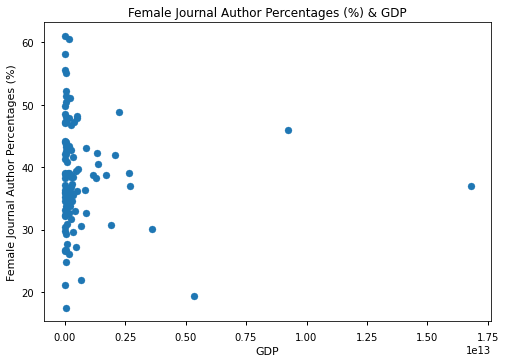

In [29]:
# relationship between GDP and women scholar percentage
plt.scatter(x = groupby['GDP'].mean(), y = groupby['F_percentage'].mean())
plt.xlabel('GDP')
plt.ylabel('Female Journal Author Percentages (%)')
plt.title('Female Journal Author Percentages (%) & GDP')
plt.show()

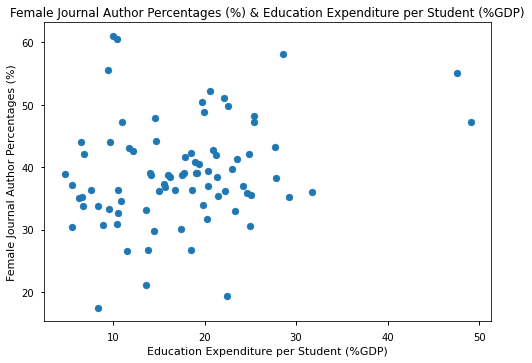

In [30]:
# re-draw the graph above with natural log(expenditure)

plt.scatter(x = groupby['expenditure_per_student(%GDP)'].mean(), y = groupby['F_percentage'].mean())
plt.xlabel('Education Expenditure per Student (%GDP)')
plt.ylabel('Female Journal Author Percentages (%)')
plt.title('Female Journal Author Percentages (%) & Education Expenditure per Student (%GDP)')
plt.show()

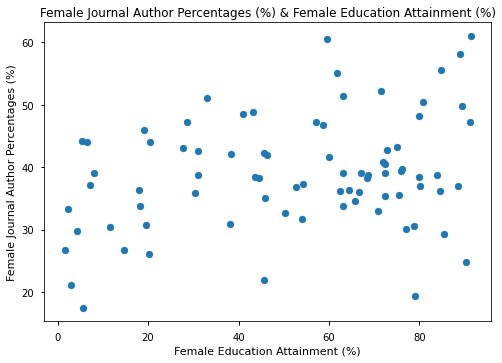

In [31]:
plt.scatter(x = groupby['e_a_percentage(%)'].mean(), y = groupby['F_percentage'].mean())
plt.xlabel('Female Education Attainment (%)')
plt.ylabel('Female Journal Author Percentages (%)')
plt.title('Female Journal Author Percentages (%) & Female Education Attainment (%)')
plt.show()

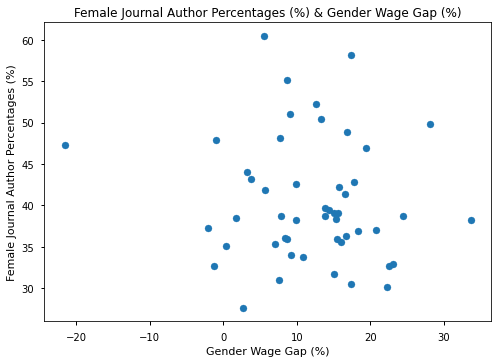

In [32]:
plt.scatter(x = groupby['gender_wage_gap(%)'].mean(), y = groupby['F_percentage'].mean())
plt.xlabel('Gender Wage Gap (%)')
plt.ylabel('Female Journal Author Percentages (%)')
plt.title('Female Journal Author Percentages (%) & Gender Wage Gap (%)')
plt.show()

##### Clarification:
Now I will visualize the relationship of women participation in journals with less relative factors (GDP) and high relative factors (female education attainment) to further prove my observations from above.

In [33]:
# calculate global means of percentage of women participation in journals
global_mean = np.round(overall_df['F_percentage'].mean())
groupby_mean = np.round(groupby['F_percentage'].mean())

print('Global Mean Percentage is ' + str(global_mean) + '%')
print('Mean Percentages of variable countries: (%) \n' + str(groupby_mean) + '%')

Global Mean Percentage is 38.0%
Mean Percentages of variable countries: (%) 
country
Algeria       43.0
Argentina     48.0
Armenia       47.0
Australia     40.0
Austria       33.0
              ... 
Uzbekistan    25.0
Venezuela     46.0
Vietnam       34.0
Zambia        33.0
Zimbabwe      39.0
Name: F_percentage, Length: 116, dtype: float64%


##### Analysis:
It shows that the mean percentage is below 50%, which gives out the fact that women's academic participation overall remained lower than men's between 2010 and 2016.

In [34]:
# calculate global means of GDP
global_mean_gdp = np.round(overall_df['GDP'].mean())
groupby_mean_gdp = np.round(groupby['GDP'].mean())

print('Global Mean GDP is ' + str(global_mean_gdp))
print('Mean Percentages of variable countries: ($) \n' + str(groupby_mean_gdp) )

Global Mean GDP is 673772198524.0
Mean Percentages of variable countries: ($) 
country
Algeria       1.883963e+11
Argentina     5.297579e+11
Armenia       1.055405e+10
Australia     1.378343e+12
Austria       4.110369e+11
                  ...     
Uzbekistan    5.599303e+10
Venezuela              NaN
Vietnam       1.661764e+11
Zambia        2.380621e+10
Zimbabwe      1.439289e+10
Name: GDP, Length: 116, dtype: float64


In [35]:
# calculate global means of female education attainment
global_mean_ea = np.round(overall_df['e_a_percentage(%)'].mean())
groupby_mean_ea = np.round(groupby['e_a_percentage(%)'].mean())

print('Global Mean female education attainment is ' + str(global_mean_ea))
print('Mean Percentages of variable countries: (%) \n' + str(groupby_mean_ea) )

Global Mean female education attainment is 59.0
Mean Percentages of variable countries: (%) 
country
Algeria        NaN
Argentina      NaN
Armenia       91.0
Australia     72.0
Austria       71.0
              ... 
Uzbekistan    90.0
Venezuela      NaN
Vietnam        NaN
Zambia         NaN
Zimbabwe       8.0
Name: e_a_percentage(%), Length: 116, dtype: float64


In [36]:
# calculate the global standard deviation of percentage of women participation in journals
global_sd = np.round(overall_df['F_percentage'].std())
groupby_sd = np.round(groupby['F_percentage'].std())

print('Global standard deviation is ' + str(global_sd) + '%')
print('Standard deviations of variable countries: (%) \n' + str(groupby_sd) + '%')

Global standard deviation is 9.0%
Standard deviations of variable countries: (%) 
country
Algeria        4.0
Argentina      1.0
Armenia        8.0
Australia      1.0
Austria        1.0
              ... 
Uzbekistan    11.0
Venezuela      4.0
Vietnam        2.0
Zambia         5.0
Zimbabwe       4.0
Name: F_percentage, Length: 116, dtype: float64%


In [37]:
# calculate the descending global means of percentage of women participation in journals
Dsorted_df = groupby['F_percentage'].mean().sort_values(ascending=False)
print('Descending Global Means of percentage of women participation in journals(%)\n' \
      + str(Dsorted_df.head(10)) + '%')

Descending Global Means of percentage of women participation in journals(%)
country
Georgia      61.024803
Romania      60.460076
Latvia       58.167119
Bermuda      55.518207
Serbia       55.124549
Bulgaria     52.277521
Croatia      51.418878
Portugal     51.065170
Lithuania    50.404175
Estonia      49.866621
Name: F_percentage, dtype: float64%


In [38]:
# calculate the descending global means of GDP
Dsorted_df_gdp = groupby['GDP'].mean().sort_values(ascending=False)
print('Descending Global Means of GDP($)\n' + str(Dsorted_df_gdp.head(10)) + '$')

Descending Global Means of GDP($)
country
United States     1.678105e+13
China             9.226733e+12
Japan             5.341208e+12
Germany           3.602186e+12
United Kingdom    2.717011e+12
France            2.678252e+12
Brazil            2.259843e+12
Italy             2.063951e+12
India             1.936154e+12
Canada            1.706354e+12
Name: GDP, dtype: float64$


In [39]:
# calculate the descending global means of female educational attainment
Dsorted_df_ea = groupby['e_a_percentage(%)'].mean().sort_values(ascending=False)
print('Descending Global Means of female educational attainment(%)\n' \
      + str(Dsorted_df_ea.head(10)) + '%')

Descending Global Means of female educational attainment(%)
country
Georgia           91.290337
Armenia           91.205162
Uzbekistan        90.315947
Estonia           89.376254
Latvia            89.027049
United States     88.511915
Azerbaijan        85.466666
Bermuda           84.796906
Czech Republic    84.484119
Canada            83.813946
Name: e_a_percentage(%), dtype: float64%


In [40]:
# calculate the ascending global means of percentage of women participation in journals
Asorted_df = groupby['F_percentage'].mean().sort_values(ascending=True)
print('Ascending Global Means of percentage of women participation in journals(%)\n' \
      + str(Asorted_df.head(10)) + '%')

Ascending Global Means of percentage of women participation in journals(%)
country
Ethiopia        17.478732
Japan           19.310225
Togo            21.120083
Saudi Arabia    21.908244
Uzbekistan      24.874063
Bangladesh      26.073671
Benin           26.519171
Burkina Faso    26.648094
Ghana           26.677208
Nigeria         27.136955
Name: F_percentage, dtype: float64%


In [41]:
# calculate the ascending global means of GDP
Asorted_df_gdp = groupby['GDP'].mean().sort_values(ascending=True)
print('Ascending Global Means of GDP($)\n' + str(Asorted_df_gdp.head(10)) + '$')

Ascending Global Means of GDP($)
country
Sierra Leone    3.897858e+09
Togo            3.978146e+09
Bermuda         5.601608e+09
Malawi          6.338766e+09
Rwanda          7.408184e+09
Haiti           8.000822e+09
Benin           8.382154e+09
Madagascar      9.937580e+09
Malta           1.001399e+10
Armenia         1.055405e+10
Name: GDP, dtype: float64$


In [42]:
# calculate the ascending global means of female educational attainment
Asorted_df_ea = groupby['e_a_percentage(%)'].mean().sort_values(ascending=True)
print('Ascending Global Means of female educational attainment(%)\n' + str(Asorted_df_ea.head(10)) + '%')

Ascending Global Means of female educational attainment(%)
country
Burkina Faso     1.571920
Tanzania         2.285880
Togo             3.036320
Senegal          4.223500
Mozambique       5.417245
Ethiopia         5.659920
Rwanda           6.477490
Uganda           7.186145
Zimbabwe         7.970530
Cameroon        11.477010
Name: e_a_percentage(%), dtype: float64%


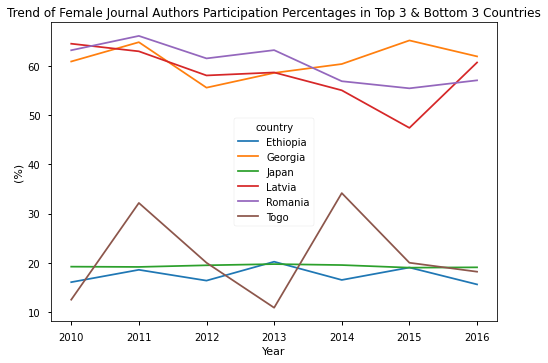

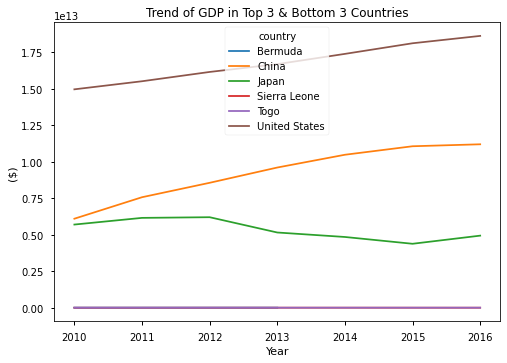

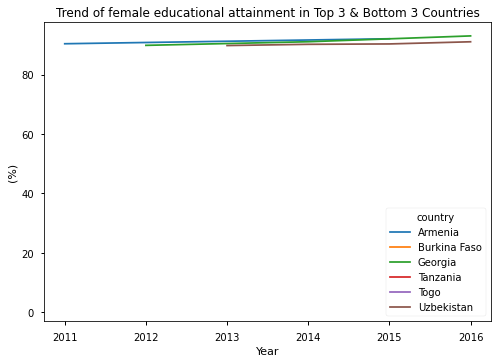

In [43]:
# visualize trend of percentage of women participation in journals
Dtop_cname = set(['Georgia', 'Romania', 'Latvia'])
Dtop_df = overall_df.loc[overall_df['country'].isin(Dtop_cname)]

Atop_cname = set(['Ethiopia', 'Japan', 'Togo'])
Atop_df = overall_df.loc[overall_df['country'].isin(Atop_cname)]

example_df = overall_df.loc[overall_df['country'].isin(Atop_cname) | overall_df['country'].isin(Dtop_cname)]

line = sns.lineplot(data = example_df, x = 'year', y = 'F_percentage', hue = 'country')
plt.xlabel('Year')
plt.ylabel('(%)')
plt.title('Trend of Female Journal Authors Participation Percentages in Top 3 & Bottom 3 Countries')
plt.show()

# visualize trend of GDP
Dtop_cname_gdp = set(['United States', 'China', 'Japan'])
Dtop_df_gdp = overall_df.loc[overall_df['country'].isin(Dtop_cname_gdp)]

Atop_cname_gdp = set(['Sierra Leone', 'Togo', 'Bermuda'])
Atop_df_gdp = overall_df.loc[overall_df['country'].isin(Atop_cname_gdp)]

example_df_gdp = overall_df.loc[overall_df['country'].isin(Atop_cname_gdp) | overall_df['country'].isin(Dtop_cname_gdp)]

line = sns.lineplot(data = example_df_gdp, x = 'year', y = 'GDP', hue = 'country')
plt.xlabel('Year')
plt.ylabel('($)')
plt.title('Trend of GDP in Top 3 & Bottom 3 Countries')
plt.show()

# visualize trend of female educational attainment
Dtop_cname_ea = set(['Georgia', 'Armenia', 'Uzbekistan'])
Dtop_df_ea = overall_df.loc[overall_df['country'].isin(Dtop_cname_ea)]

Atop_cname_ea = set(['Burkina Faso', 'Tanzania', 'Togo'])
Atop_df_ea = overall_df.loc[overall_df['country'].isin(Atop_cname_ea)]

example_df_ea = overall_df.loc[overall_df['country'].isin(Atop_cname_ea) | overall_df['country'].isin(Dtop_cname_ea)]

line = sns.lineplot(data = example_df_ea, x = 'year', y = 'e_a_percentage(%)', hue = 'country')
plt.xlabel('Year')
plt.ylabel('(%)')
plt.title('Trend of female educational attainment in Top 3 & Bottom 3 Countries')
plt.show()




##### Analysis:
As it showed above, some countries with fewer women participating in journals (compared with men) can be developed countries with top GDP ranking (e.g., Japan). And although some countries don't have top GDP ranking, their women's participation in journals is still high, and their female educational attainment is relatively high. The most obvious example is Georgia. 

These observations assume that female educational attainment plays a more significant role in improving women's participation in journal writing. It indicates that the main factor promoting women's academic involvement is not the overall economic status of countries but the degree to which society attaches importance to education for women and the popularization of their education. While a country's resources may be well-developed, whether the community supports women's access to these resources determines their academic participation. Therefore, the country's emphasis on female education and the degree of gender equality in the academic field are the main indicators that determine female participation in the academic field.

### Questions for reviewers
1. Are the variables included in my research question enough to target the scenario I want to study on?
2. Are my data ranges large enough? Should I consider data before 2010 or after 2016?